# Renko Chart Analysis
## Objective:
    ### 01: Analize different time frames with perticular box value
    ### 02: Use indicators to identify trends and corelation 
    ### 03: Build a Strategy to back test 
    

In [134]:
import MetaTrader5 as mt
import pandas as pd
import plotly.express as px
from datetime import datetime
import numpy as np
import time
import pytz 

mt.initialize()

True

In [36]:
def get_ticks(symbol, start_date, end_date):
       
    mt.initialize()
    if not mt.initialize():
        print("initialize() failed")
        mt.shutdown()
        return None

    timeframe = mt.TIMEFRAME_H1
    
    s_date = datetime.strptime(start_date, "%Y-%m-%d")
    s_year = s_date.year
    s_month = s_date.month
    s_day = s_date.day
    
    e_date = datetime.strptime(end_date, "%Y-%m-%d")
    e_year = e_date.year
    e_month = e_date.month
    e_day = e_date.day
    
    if start_date > end_date:
        print("Start date cannot be after end date")
        mt.shutdown()
        return None

    timezone = pytz.timezone("Etc/UTC")
    utc_from = datetime(s_year, s_month, s_day, tzinfo=timezone)
    utc_to = datetime(e_year, e_month, e_day, hour = 13, tzinfo=timezone)
    # get bars from USDJPY M5 within the interval of 2020.01.10 00:00 - 2020.01.11 13:00 in UTC time zone
    rates = mt.copy_ticks_range(symbol, utc_from, utc_to, mt.COPY_TICKS_ALL)

    #rates = mt.copy_rates_range("XAUUSDm", timeframe, "2023-12-01", "2024-01-01")

    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')

    mt.shutdown()
    return rates

In [53]:
df = get_ticks('XAUUSDm','2024-01-03','2024-01-05')

In [54]:
len(df)


250144

In [55]:
df = pd.DataFrame(df)

In [56]:
df

,time,bid,ask,last,volume,time_msc,flags,volume_real
0,1704240000,2059.448,2060.048,0.0,0,1704240000124,134,0.0
1,1704240001,2059.606,2059.806,0.0,0,1704240001686,134,0.0
2,1704240001,2059.551,2059.751,0.0,0,1704240001732,134,0.0
3,1704240003,2059.542,2059.742,0.0,0,1704240003545,134,0.0
4,1704240005,2059.550,2059.750,0.0,0,1704240005973,134,0.0
...,...,...,...,...,...,...,...,...
250139,1704444109,2042.547,2042.747,0.0,0,1704444109795,6,0.0
250140,1704444110,2042.541,2042.741,0.0,0,1704444110832,6,0.0
250141,1704444112,2042.568,2042.768,0.0,0,1704444112034,6,0.0
250142,1704444113,2042.519,2042.719,0.0,0,1704444113383,6,0.0


In [57]:
df['time']=pd.to_datetime(df['time'], unit='s')

In [58]:
df

,time,bid,ask,last,volume,time_msc,flags,volume_real
0,2024-01-03 00:00:00,2059.448,2060.048,0.0,0,1704240000124,134,0.0
1,2024-01-03 00:00:01,2059.606,2059.806,0.0,0,1704240001686,134,0.0
2,2024-01-03 00:00:01,2059.551,2059.751,0.0,0,1704240001732,134,0.0
3,2024-01-03 00:00:03,2059.542,2059.742,0.0,0,1704240003545,134,0.0
4,2024-01-03 00:00:05,2059.550,2059.750,0.0,0,1704240005973,134,0.0
...,...,...,...,...,...,...,...,...
250139,2024-01-05 08:41:49,2042.547,2042.747,0.0,0,1704444109795,6,0.0
250140,2024-01-05 08:41:50,2042.541,2042.741,0.0,0,1704444110832,6,0.0
250141,2024-01-05 08:41:52,2042.568,2042.768,0.0,0,1704444112034,6,0.0
250142,2024-01-05 08:41:53,2042.519,2042.719,0.0,0,1704444113383,6,0.0


In [59]:
df = df.set_index('time')

In [60]:
df

,bid,ask,last,volume,time_msc,flags,volume_real
time,,,,,,,
2024-01-03 00:00:00,2059.448,2060.048,0.0,0,1704240000124,134,0.0
2024-01-03 00:00:01,2059.606,2059.806,0.0,0,1704240001686,134,0.0
2024-01-03 00:00:01,2059.551,2059.751,0.0,0,1704240001732,134,0.0
2024-01-03 00:00:03,2059.542,2059.742,0.0,0,1704240003545,134,0.0
2024-01-03 00:00:05,2059.550,2059.750,0.0,0,1704240005973,134,0.0
...,...,...,...,...,...,...,...
2024-01-05 08:41:49,2042.547,2042.747,0.0,0,1704444109795,6,0.0
2024-01-05 08:41:50,2042.541,2042.741,0.0,0,1704444110832,6,0.0
2024-01-05 08:41:52,2042.568,2042.768,0.0,0,1704444112034,6,0.0


In [61]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to generate Renko bricks
def generate_renko_bricks(data, brick_size):
    bricks = []
    current_brick = 0

    for i in range(1, len(data)):
        price_diff = data['bid'][i] - data['bid'][i - 1]

        # Calculate the number of bricks
        bricks_count = int(abs(price_diff) / brick_size)

        # Determine the direction of the bricks
        if price_diff > 0:
            bricks += [current_brick + j * brick_size for j in range(1, bricks_count + 1)]
        elif price_diff < 0:
            bricks += [current_brick - j * brick_size for j in range(1, bricks_count + 1)]
        else:
            bricks += [current_brick] * bricks_count

        # Update the current brick value
        if bricks:
            current_brick = bricks[-1]
            
        index = data.index[1:len(bricks)+1]
    
    return pd.Series(bricks, index=index)



In [65]:
rendf= generate_renko_bricks(df, 5)

C:\Users\rozir\AppData\Local\Temp\ipykernel_8340\1057519578.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(bricks, index=index)


In [66]:
rendf

Series([], dtype: float64)

In [67]:
print(rendf)

Series([], dtype: float64)


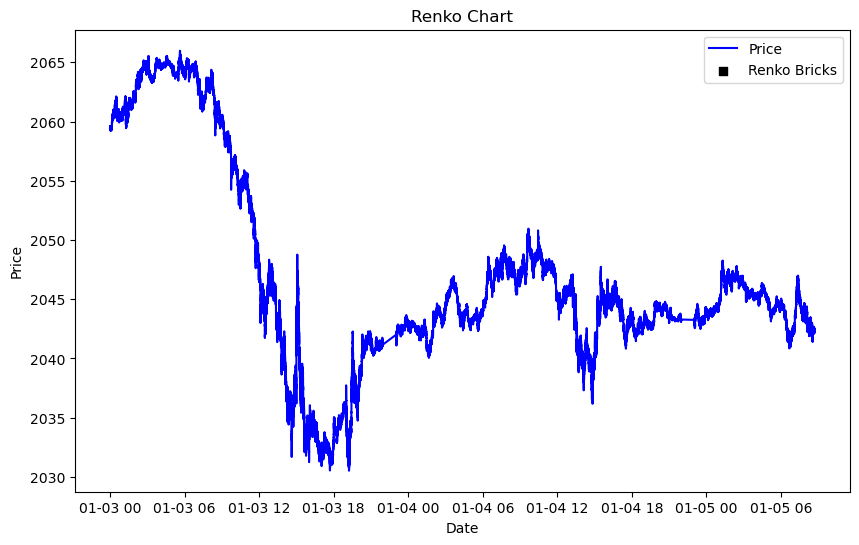

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(df['bid'], label='Price', color='blue')
plt.scatter(rendf.index, rendf.values, color='black', marker='s', label='Renko Bricks')
plt.title('Renko Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
import mplfinance as mpl

In [90]:
def get_candels(symbol,timeframe, start_date, end_date):
       
    mt.initialize()
    if not mt.initialize():
        print("initialize() failed")
        mt.shutdown()
        return None

    timeframe = mt.TIMEFRAME_H1
    
    s_date = datetime.strptime(start_date, "%Y-%m-%d")
    s_year = s_date.year
    s_month = s_date.month
    s_day = s_date.day
    
    e_date = datetime.strptime(end_date, "%Y-%m-%d")
    e_year = e_date.year
    e_month = e_date.month
    e_day = e_date.day
    
    if start_date > end_date:
        print("Start date cannot be after end date")
        mt.shutdown()
        return None

    timezone = pytz.timezone("Etc/UTC")
    utc_from = datetime(s_year, s_month, s_day, tzinfo=timezone)
    utc_to = datetime(e_year, e_month, e_day, hour = 13, tzinfo=timezone)
    # get bars from USDJPY M5 within the interval of 2020.01.10 00:00 - 2020.01.11 13:00 in UTC time zone
    rates = mt.copy_rates_range(symbol, timeframe, utc_from, utc_to)

    #rates = mt.copy_rates_range("XAUUSDm", timeframe, "2023-12-01", "2024-01-01")

    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    
    df= df.set_index('time')
    #df.index = pd.to_datetime(df.index)
    df = df.drop(columns=['tick_volume','spread','real_volume'])
    df = df.rename(columns={'open':'Open','high':'High','low':'Low','close':'Close'})
    mt.shutdown()
    return df

In [91]:
onemindf= get_candels('XAUUSDm',mt.TIMEFRAME_M1,'2024-01-01','2024-01-05')

In [93]:
onemindf

,Open,High,Low,Close
time,,,,
2024-01-01 23:00:00,2064.593,2066.095,2062.645,2063.543
2024-01-02 00:00:00,2063.347,2065.762,2062.174,2065.340
2024-01-02 01:00:00,2065.341,2069.900,2064.870,2066.536
2024-01-02 02:00:00,2066.512,2068.267,2063.891,2067.669
2024-01-02 03:00:00,2067.693,2070.338,2066.422,2069.487
...,...,...,...,...
2024-01-05 05:00:00,2044.551,2045.249,2043.128,2044.452
2024-01-05 06:00:00,2044.454,2045.060,2040.847,2042.420
2024-01-05 07:00:00,2042.421,2046.995,2042.027,2043.125


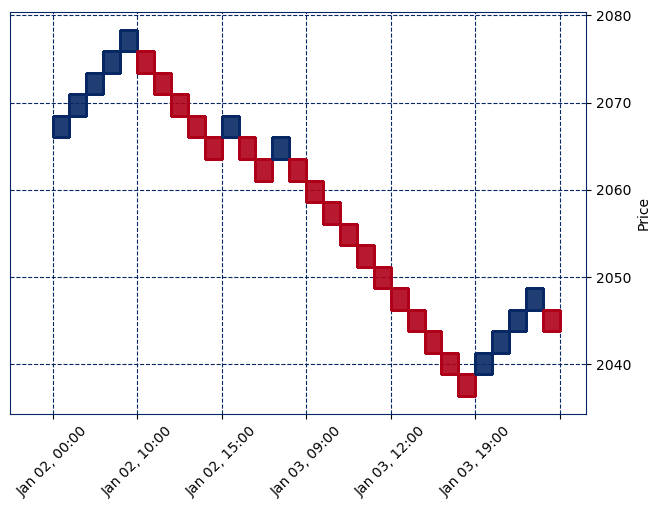

In [94]:
mpl.plot(onemindf, type='renko',
        style='sas')

In [95]:
!pip install renko

Note: you may need to restart the kernel to use updated packages.


In [96]:
from renko import Renko

In [97]:
rnk = Renko(10,onemindf.Close)
rnk.create_renko()
print(rnk.bricks)

[{'type': 'first', 'open': 2063.543, 'close': 2063.543}, {'type': 'up', 'open': 2063.543, 'close': 2073.543}, {'type': 'down', 'open': 2063.543, 'close': 2053.543, 'high': 2077.032}, {'type': 'down', 'open': 2053.543, 'close': 2043.5430000000001}, {'type': 'down', 'open': 2043.5430000000001, 'close': 2033.5430000000001}]


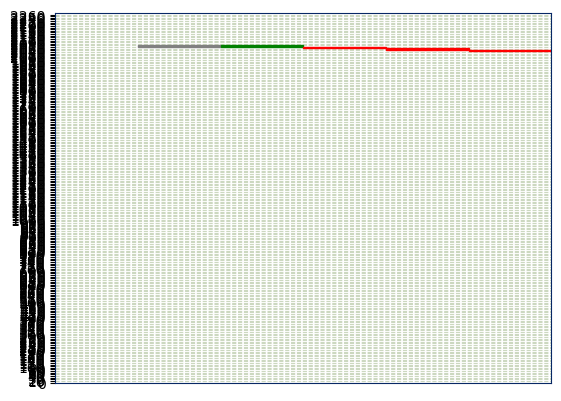

In [98]:
rnk.draw_chart()

In [100]:
type(rnk.bricks)

list

In [101]:
df = pd.DataFrame(rnk.bricks, columns=['type','open','close'])

In [102]:
df

,type,open,close
0,first,2063.543,2063.543
1,up,2063.543,2073.543
2,down,2063.543,2053.543
3,down,2053.543,2043.543
4,down,2043.543,2033.543


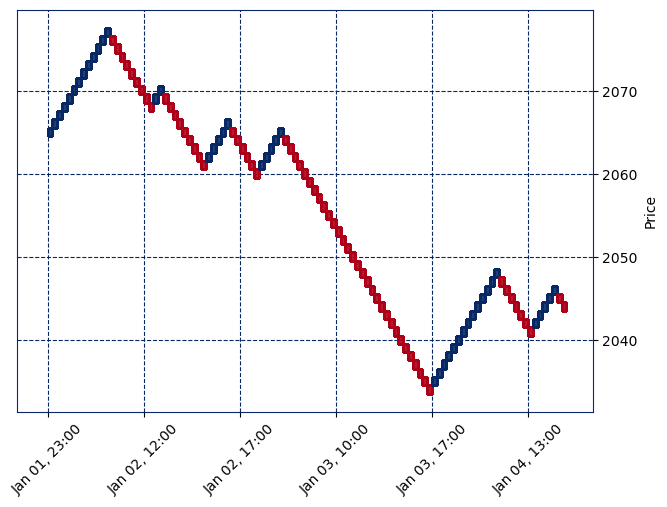

In [107]:
mpl.plot(onemindf, type='renko',
        style='sas',
        renko_params=dict(brick_size=1))

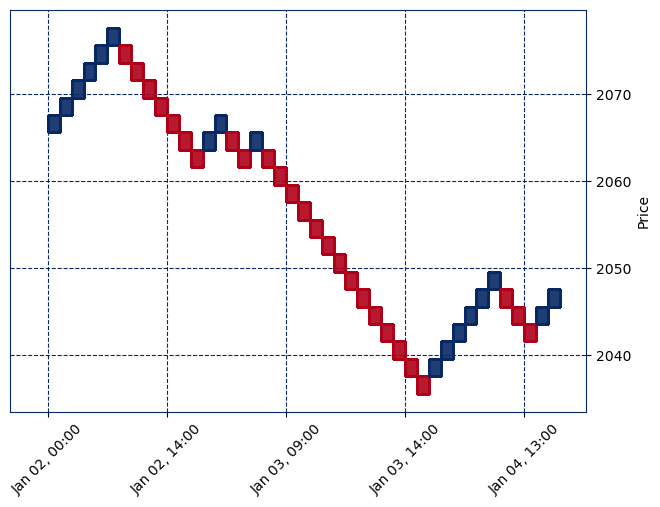

In [112]:
retvals = {}
mpl.plot(onemindf, type='renko',
        style='sas',
        renko_params=dict(brick_size=2),
        return_calculated_values=retvals)

In [113]:
retvals

{'renko_bricks': [2065.543,
  2067.543,
  2069.543,
  2071.543,
  2073.543,
  2075.543,
  2073.543,
  2071.543,
  2069.543,
  2067.543,
  2065.543,
  2063.543,
  2061.543,
  2063.543,
  2065.543,
  2063.543,
  2061.543,
  2063.543,
  2061.543,
  2059.543,
  2057.543,
  2055.543,
  2053.543,
  2051.543,
  2049.543,
  2047.5430000000001,
  2045.5430000000001,
  2043.5430000000001,
  2041.5430000000001,
  2039.5430000000001,
  2037.5430000000001,
  2035.5430000000001,
  2037.5430000000001,
  2039.5430000000001,
  2041.5430000000001,
  2043.5430000000001,
  2045.5430000000001,
  2047.5430000000001,
  2045.5430000000001,
  2043.5430000000001,
  2041.5430000000001,
  2043.5430000000001,
  2045.5430000000001],
 'renko_dates': [datetime.datetime(2024, 1, 2, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2024, 1, 2, 1, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2024, 1, 2, 4, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2024, 1, 2, 4, 0, tzinfo=datetime.timezone.ut

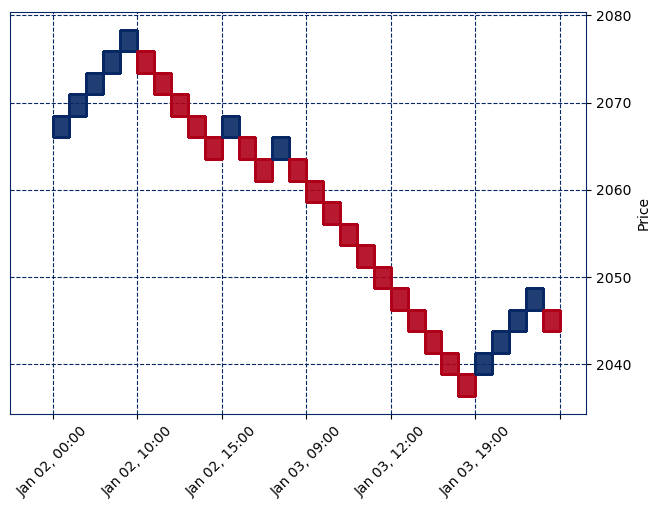

In [114]:
retvals = {}
mpl.plot(onemindf, type='renko',
        style='sas',
        return_calculated_values=retvals)

In [116]:
retvals['renko_size']

2.467642857142859

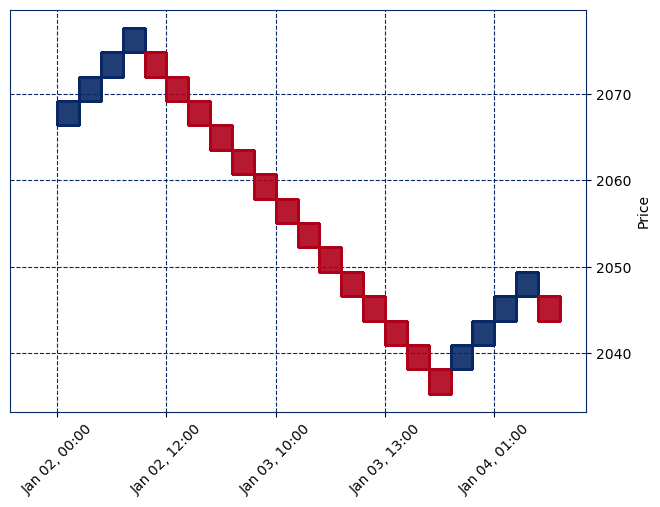

In [119]:
retvals = {}
mpl.plot(onemindf, type='renko',
        style='sas',
        renko_params=dict(atr_length=9),
        return_calculated_values=retvals)

In [120]:
retvals['renko_size']



2.8273333333333235

In [121]:
twomindf= get_candels('XAUUSDm',mt.TIMEFRAME_M2,'2023-01-01','2024-01-05')

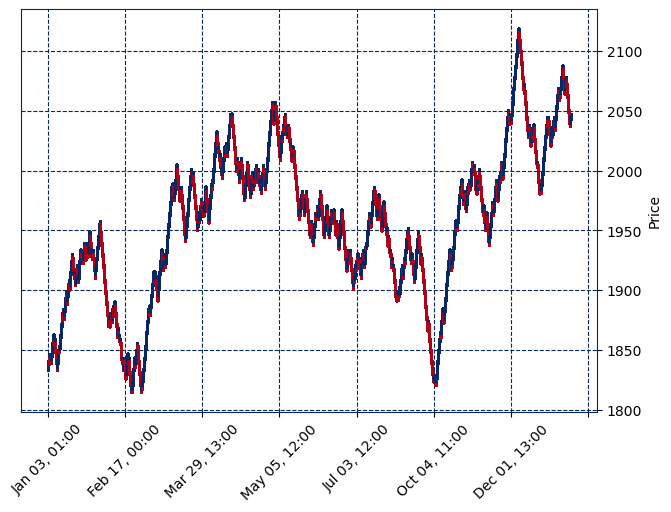

In [124]:
mpl.plot(twomindf, type='renko',
        style='sas',
        renko_params=dict(atr_length=9)
        )

mpl.show()

In [126]:
mpl.show()

In [127]:
fifmindf= get_candels('XAUUSDm',mt.TIMEFRAME_M15,'2023-01-01','2024-01-05')

In [128]:
fifmindf

,Open,High,Low,Close
time,,,,
2023-01-02 23:00:00,1825.968,1830.460,1823.998,1829.131
2023-01-03 00:00:00,1829.110,1831.840,1828.469,1830.585
2023-01-03 01:00:00,1830.534,1832.330,1826.747,1828.477
2023-01-03 02:00:00,1828.510,1839.647,1828.260,1838.329
2023-01-03 03:00:00,1838.360,1843.079,1838.360,1841.151
...,...,...,...,...
2024-01-05 05:00:00,2044.551,2045.249,2043.128,2044.452
2024-01-05 06:00:00,2044.454,2045.060,2040.847,2042.420
2024-01-05 07:00:00,2042.421,2046.995,2042.027,2043.125


In [129]:
df30m= get_candels('XAUUSDm',mt.TIMEFRAME_M30,'2023-01-01','2024-01-05')

In [130]:
df30m

,Open,High,Low,Close
time,,,,
2023-01-02 23:00:00,1825.968,1830.460,1823.998,1829.131
2023-01-03 00:00:00,1829.110,1831.840,1828.469,1830.585
2023-01-03 01:00:00,1830.534,1832.330,1826.747,1828.477
2023-01-03 02:00:00,1828.510,1839.647,1828.260,1838.329
2023-01-03 03:00:00,1838.360,1843.079,1838.360,1841.151
...,...,...,...,...
2024-01-05 05:00:00,2044.551,2045.249,2043.128,2044.452
2024-01-05 06:00:00,2044.454,2045.060,2040.847,2042.420
2024-01-05 07:00:00,2042.421,2046.995,2042.027,2043.125


In [131]:
twomindf

,Open,High,Low,Close
time,,,,
2023-01-02 23:00:00,1825.968,1830.460,1823.998,1829.131
2023-01-03 00:00:00,1829.110,1831.840,1828.469,1830.585
2023-01-03 01:00:00,1830.534,1832.330,1826.747,1828.477
2023-01-03 02:00:00,1828.510,1839.647,1828.260,1838.329
2023-01-03 03:00:00,1838.360,1843.079,1838.360,1841.151
...,...,...,...,...
2024-01-05 05:00:00,2044.551,2045.249,2043.128,2044.452
2024-01-05 06:00:00,2044.454,2045.060,2040.847,2042.420
2024-01-05 07:00:00,2042.421,2046.995,2042.027,2043.125


In [137]:
dfh1= get_candels('XAUUSDm',mt.TIMEFRAME_H4,'2023-06-01','2024-01-05')

In [138]:
dfh1

,Open,High,Low,Close
time,,,,
2023-06-01 00:00:00,1966.275,1967.384,1964.928,1965.872
2023-06-01 01:00:00,1965.868,1967.446,1961.996,1965.566
2023-06-01 02:00:00,1965.598,1965.668,1963.183,1964.466
2023-06-01 03:00:00,1964.467,1966.121,1963.827,1964.178
2023-06-01 04:00:00,1964.194,1964.919,1963.346,1963.938
...,...,...,...,...
2024-01-05 06:00:00,2044.454,2045.060,2040.847,2042.420
2024-01-05 07:00:00,2042.421,2046.995,2042.027,2043.125
2024-01-05 08:00:00,2043.141,2044.396,2041.393,2042.389


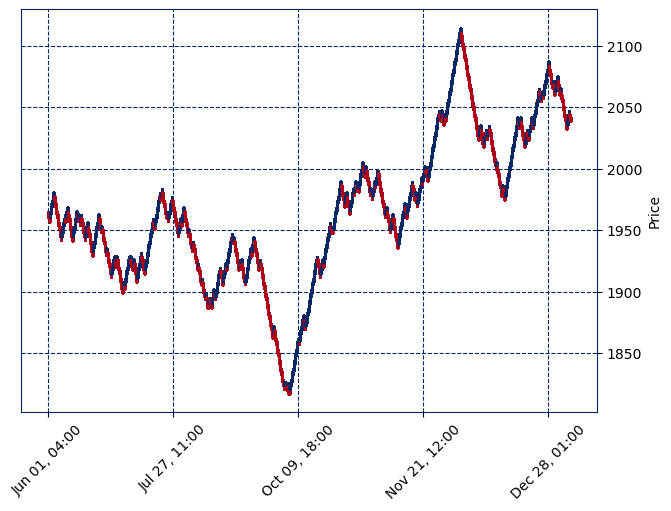

In [139]:

mpl.plot(dfh1, type='renko',
        style='sas',
        renko_params=dict(atr_length=9)
        )

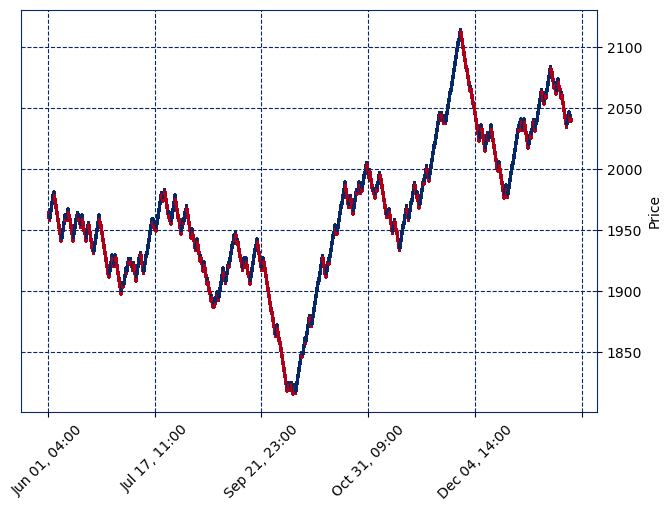

In [143]:
retvals = {}

mpl.plot(dfh1, type='renko',
        style='sas',
        return_calculated_values=retvals,
        )

In [144]:
retvals['renko_size']

2.7299285714285753

In [145]:
dfh13mon= get_candels('XAUUSDm',mt.TIMEFRAME_H4,'2023-09-01','2024-01-05')

In [146]:
dfh13mon

,Open,High,Low,Close
time,,,,
2023-09-01 00:00:00,1939.828,1940.235,1938.638,1939.276
2023-09-01 01:00:00,1939.302,1943.911,1939.293,1942.527
2023-09-01 02:00:00,1942.536,1942.594,1939.974,1940.476
2023-09-01 03:00:00,1940.440,1940.440,1938.681,1938.907
2023-09-01 04:00:00,1938.899,1940.160,1938.191,1939.954
...,...,...,...,...
2024-01-05 06:00:00,2044.454,2045.060,2040.847,2042.420
2024-01-05 07:00:00,2042.421,2046.995,2042.027,2043.125
2024-01-05 08:00:00,2043.141,2044.396,2041.393,2042.389


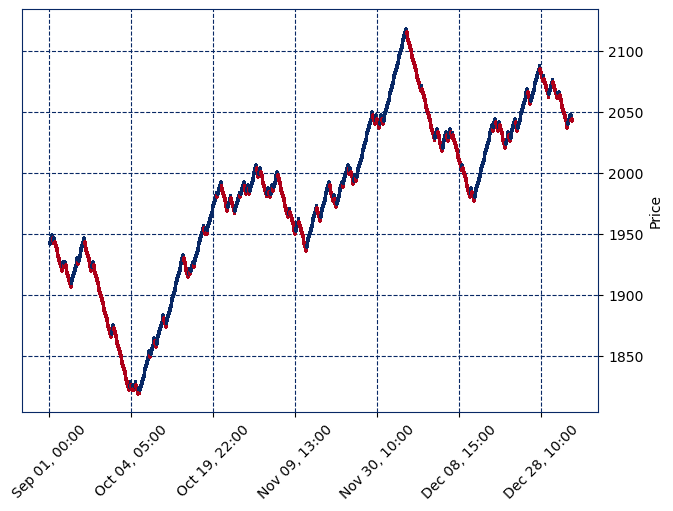

In [147]:
retvals = {}

mpl.plot(dfh13mon, type='renko',
        style='sas',
        return_calculated_values=retvals,
        )

In [148]:
retvals['renko_size']

2.7299285714285753

In [149]:
last14days= get_candels('XAUUSDm',mt.TIMEFRAME_H4,'2023-12-22','2024-01-05')

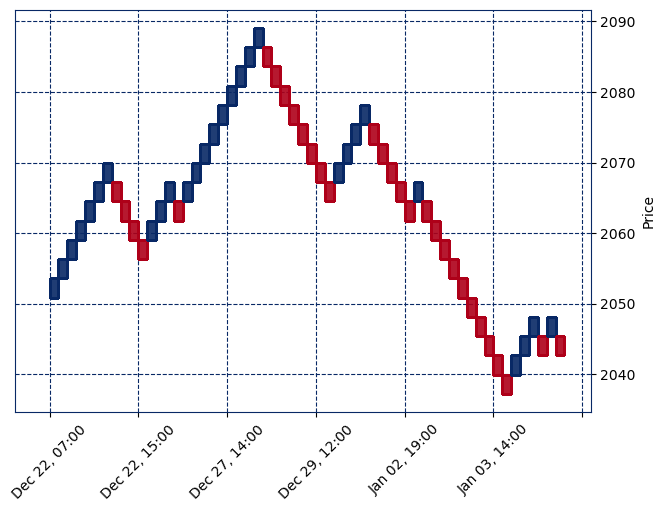

In [151]:
dfh13mon= retvals = {}

mpl.plot(last14days, type='renko',
        style='sas',
        return_calculated_values=retvals,
        )

In [152]:
retvals['renko_size']

2.7299285714285753

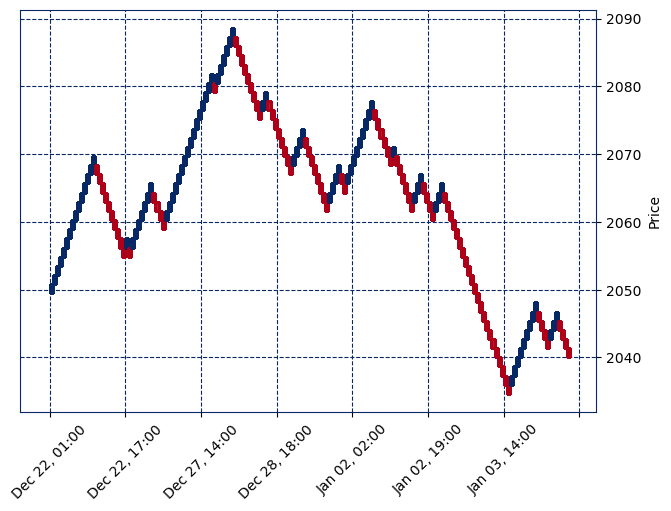

In [156]:

mpl.plot(last14days, type='renko',
        style='sas',
        renko_params=dict(brick_size=1.35),
        )

In [ ]:
retvals = {}
mpl.plot(onemindf, type='renko',
        style='sas',
        renko_params=dict(brick_size=2),
        return_calculated_values=retvals)